In [1]:
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *
# from torch.utils.data import Dataset, DataLoader

In [2]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
class TrajectoriesDataset():
    def __init__(self, root_dir, num_input_points, input_dim=3, shuffle=False):
        self.root_dir = root_dir
        self.num_input_points = num_input_points
        self.input_dim = input_dim
        self.shuffle = shuffle
        self.all_filepaths = [a for (a, b, c) in os.walk(self.root_dir) if len(b) == 0]

    def __len__(self):
        return len(self.all_filepaths)

    def __getitem__(self, filepath_idx):
        traj_array = np.zeros((self.num_input_points, self.input_dim))
        target_array = np.zeros((self.num_input_points, self.input_dim))
        filepath = os.path.join(self.all_filepaths[filepath_idx], "skeleton.txt")

        with open(filepath) as file:
            file_contents = file.readlines()
            if len(file_contents) >= self.num_input_points + 1:
                for i in range(self.num_input_points):
                    traj_array[i, 0] = file_contents[i].split()[1]
                    traj_array[i, 1] = file_contents[i].split()[2]
                    traj_array[i, 2] = file_contents[i].split()[3]
                    target_array[i, 0] = file_contents[i+1].split()[1]
                    target_array[i, 1] = file_contents[i+1].split()[2]
                    target_array[i, 2] = file_contents[i+1].split()[3]

        return (target_array, traj_array)
    
    def sample_trajectories(self, num_samples):
        sample_ids = np.random.choice(self.__len__(), num_samples)
        traj_matrix = np.zeros((num_samples, self.num_input_points, self.input_dim))
        target_matrix = np.zeros((num_samples, self.num_input_points, self.input_dim))
        for i in range(len(sample_ids)):
            traj_matrix[i,:,:] = self.__getitem__(i)[1]
            target_matrix[i,:,:] = self.__getitem__(i)[0]
        return target_matrix, traj_matrix

In [5]:
num_input_points = config['num_input_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', num_input_points, input_dim, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', num_input_points, input_dim, shuffle)

num_samples_train = 100
Y1, X1 = train_dataset.sample_trajectories(num_samples_train)
Y1 = Y1.reshape(num_samples_train, num_input_points*input_dim, 1)
X1 = X1.reshape(num_samples_train, num_input_points*input_dim, 1)
Y2, X2 = train_dataset.sample_trajectories(num_samples_train)
Y2 = Y2.reshape(num_samples_train, num_input_points*input_dim, 1)
X2 = X2.reshape(num_samples_train, num_input_points*input_dim, 1)

num_samples_test = 10
Y_test1, X_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2 = test_dataset.sample_trajectories(num_samples_test)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5
print(Y1.shape)
print(X1.shape)


(100, 30, 1)
(100, 30, 1)


In [6]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, 10000)

loss: 2719.3535
loss: 258.66855
loss: 936.11365
loss: 1261.7214
loss: 1812.3367
loss: 26613.525
loss: 17389.992
loss: 9323.65
loss: 1851.6967
loss: 2955.79
loss: 2792.6028
loss: 2001.0559
loss: 2324.8955
loss: 871.0836
loss: 922.88947
loss: 1373.2821
loss: 1166.9092
loss: 1448.8677
loss: 960.1185
loss: 969.8584
loss: 2413.125
loss: 3676.9712
loss: 2966.7395
loss: 2749.1597
loss: 1484.5544
loss: 890.9489
loss: 1736.1111
loss: 2281.2239
loss: 604.50525
loss: 946.3586
loss: 890.19696
loss: 1635.0616
loss: 1581.044
loss: 4597.9634
loss: 26066.34
loss: 6614.077
loss: 4942.0693
loss: 7634.948
loss: 24033.053
loss: 23218.238
loss: 61556.65
loss: 29976.488
loss: 9087.653
loss: 11467.846
loss: 52055.477
loss: 19039.701
loss: 13650.229
loss: 28074.941
loss: 25896.81
loss: 31314.854
loss: 12472.802
loss: 18567.824
loss: 7900.803
loss: 10864.2295
loss: 4175.313
loss: 6368.792
loss: 7087.8467
loss: 5123.393
loss: 5246.362
loss: 2368.8804
loss: 2923.9497
loss: 1005.7585
loss: 2935.3606
loss: 2645.72

In [7]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, Y2, X2, 1000)

loss: 434.06192
loss: 75.7843
loss: 438.2768
loss: 82.77352
loss: 890.0822
loss: 53.806793
loss: 1464.5494
loss: 4329.755
loss: 38795.348
loss: 18957.803
loss: 8267.326
loss: 4619.21
loss: 3594.2715
loss: 3209.1208
loss: 1522.7668
loss: 480.60727
loss: 21889.668
loss: 19342.64
loss: 15485.516
loss: 8819.778


NameError: name 'step_mat_test' is not defined

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-pac

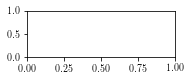

In [8]:
ind = 2
sample_size_list = [0,2,4,6,8,10,12,14,16,18,20]
plt.figure(figsize=(9,len(sample_size_list)*1))
for i,num_pts in enumerate(sample_size_list):
    X_update1 = X_test1[ind:(ind+1),:num_pts,:]
    Y_update1 = Y_test1[ind:(ind+1),:num_pts,:]
    
    X_update2 = X_test2[ind:(ind+1),:num_pts,:]
    Y_update2 = Y_test2[ind:(ind+1),:num_pts,:]
    
    title=None
    legend=False
    if i == 0:
        legend=True
        title=True

    ax1 = plt.subplot(len(sample_size_list),3,3*i+1)
    gen_multistep_fig(agent1, sess1, X_update1, Y_update1, step_mat_test[ind,:], label=None)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.1$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
        
    ax2 = plt.subplot(len(sample_size_list),3,3*i+2, sharey=ax1)
    gen_multistep_fig(agent2, sess2, X_update2, Y_update2, step_mat_test[ind,:], label=None)
    plt.setp(ax2.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.3$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax2.get_xticklabels(), visible=False)
    
    
    ax3 = plt.subplot(len(sample_size_list),3,3*i+3, sharey=ax1)
    gen_multistep_fig(agent3, sess3, X_update3, Y_update3, step_mat_test[ind,:], label=None)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == 0:
        plt.title(r'ALPaCA, ' + r'$\Sigma_\epsilon = 0.5$')
    if i < len(sample_size_list) - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)

plt.tight_layout(w_pad=0.0,h_pad=0.2)
# plt.savefig('figures/multistep_varying_noise.pdf')
plt.show()